# Opis: Program jest podzielony na sekcje:
# 1. funkcje.jl 
zawarte są tu przydatne funkcje, z których korzystam w programie, jednak są one bardziej ogólne i są silnie powiązane jedynie z funkcjami sklejanymi, dlatego zostały wyodrębnione

1.1 VectorToList(args: Vector) : Array - dostaje wektor argumentów i zwraca ich listę

1.2 myzip(xs : Array, ys : Array) : Array - dostaje parę list, zwraca listę par (do tworzenia z list xsów i yków listę, współrzędnych)

1.3 myunzip(xys : Array) : Array -> dostaje listę par, zwraca parę list (funkcja odwrotna do myzip)

1.4 makeInterval(start, end, step) -> tworzy listę kolejnych wartości z przedziału start, end o odległości step


# 2. program.jl
Jest to główny program, który oblicza i rysuje pierwiastki f(x) = c dla zadanej listy współrzędnych [(x1,y1)...(xn+1,yn+1)], wywołuje się go przez funkcję main

2.1 makeSpline(coordinates: Array of Pair(x,y)) : Array of (sk(x), (xk,xk+1))
funkcja ta dostaje listę par współrzędnych i zwraca listę par: (wielomian 3 st., przedział za który odpowiada)

2.2 findRoot((sk, (xk,xk+1)), c)) - otrzymuje parę (wielomian, przedział) oraz wartość c, zwraca listę pierwiastków sk-c na tym przedziale

2.3 findRoots(splines, c) - dostaje listę par(wielomian, przedzial) oraz c, zwraca listę pierwiastków na całym przedziale na którym określiliśmy funkcję s(x)

2.4 PlotMain - dostaje listę współrzędnych(dzięki temu namaluje zadane początkowe punkty)
    wyznaczoną listę par (sk(x), (xk,xk+1)),
    pierwiastki f(x)=c
    stałą c
    przedział a, b
 nic nie zwraca, rysuje zdane punkty, sklejenie, perwiastki, stałą c na przedziale a,b
 
2.5 main - dostaje listę współrzędnych, stałą c -> oblicza splajn, pierwiastki s(x) = c, rysuje za pomocą PlotMain, oraz zwraca obliczone wartośći pierwiastków 
 
### Testy Pierwiastki F(x) = c
 W kolejnych komórkach zamieszczone są testy: 
 korzystamy z nich wywołując opisaną wyżej funkcję main z rządanymi wartościami,
 można dodać funkcję oryginalną (o ile jest ona zadana wzorem), jest to trzymane w komórkach pod komentarzem (w każdej z komórek dodane jest bezargumentowe plot!(), bez niego się nie rysuje)
 

# 3. Przedziały F(x) = c - Program
W komórce po testach f(x) = c jest program liczący przedziały,
 opis:
3.1  intervals(coor, c) - dostaje listę współrzędnych, wyznacza splajna, oblicza przedziały na których f(x) = c, zwraca parę, w której pierwszy element zawiera listę trójek (wielomian, przedzial, przedzialy na których f(x) = c), a drugi
taką samą listę trójek, z tą różnicą, że trzeci element to wszystkie przedziały, a nie tylko te w których f(x) = c (na wypadek potrzeby ponownego liczenia dla innego c)

3.2 Pojedyncze (sk, (xk,xk+1)) zwraca trójkę (sk, (xk,xk+1), listę przedziałów charakterystycznych sk na fragmencie (xk, xk+1))

3.3 WKtorychNalezy (sk, (xk,xk+1), Przedziały) -> (sk, (xk,xk+1), Przedziały p takie że istnieje x należący do p, dla którego sk(x) = c

3.4 PlotPoch (analogiczne do PlotMain, z tą różnicą że miast argumentów : splajn, pierwiastki, otrzymuje listę trójek, wyznaczoną przez pierwszą z wartości intervals, czyli listę trójek (funkcja, przedzial, przedzialy spełniające f(x) = c)

3.5 PrzedzialyZwracająceC (PPPs : trójka, c - stała) - oblicza to listę przedziałów w których leży c, można stosować jeśli chcemy obliczyć przedziały dla nowej stałej c

3.6 main -> główna funkcja w programie obliczającym przedziały.
tak jak w program.jl, dostaje ona listę współrzędnych i stałą c, ale zwraca trójkę: ((funckja, przedział, przedziały charakterystyczne zawierające c), 
         (funckja, przedział, przedziały charakterystyczne),
         ilość przedziałów charakterystycznych zawierających c))
 
#### Testy Przedziały F(x) = c 
Poniżej testy:
kolorem czerwonym przedziały w których f(x) = c
czarnym y = c
niebieskim s(x)


In [43]:
include("program.jl")

main (generic function with 2 methods)

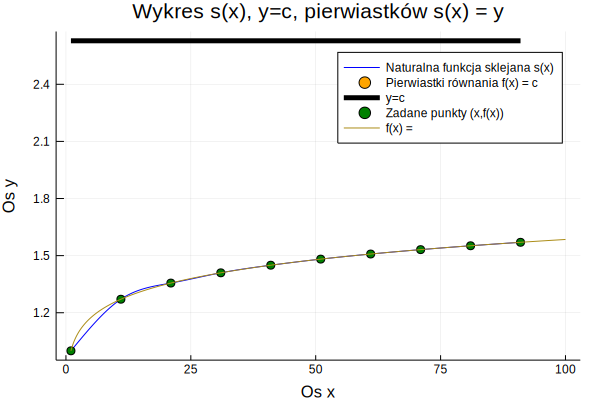

In [47]:
# f(x) = x^(1/10)
main([(x, x^(1/10)) for x in 1:10:100], rand()*3)
plot!()
# plot!([x for x in 1:0.1:100], map(x -> x^(1/10), [x for x in 1:0.1:100]), lab = "f(x) = x^(1/10)")

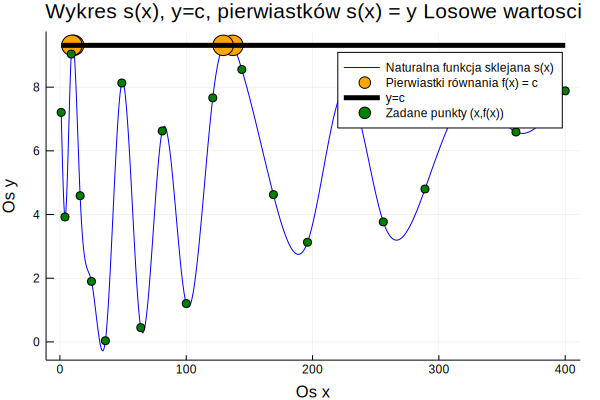

In [48]:
# losowa
main([(x^2, rand()*10) for x in 1:20], rand()*10, " Losowe wartosci")
plot!()

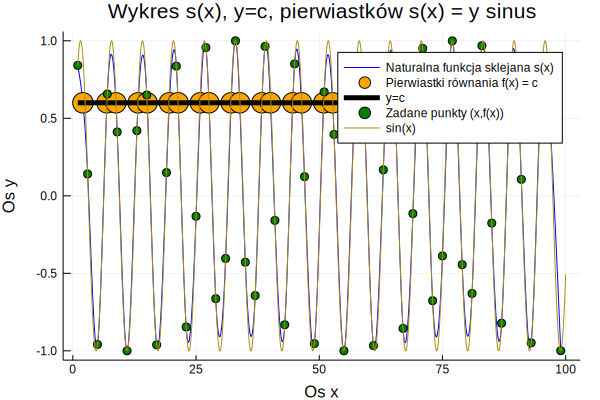

In [50]:
# f(x) = sin(x)
main([(x, sin(x)) for x in 1:2:100], 0.6, " sinus")
plot!()
plot!([x for x in 1:0.01:100], [sin(x) for x in 1:0.01:100], lab = " sin(x)")

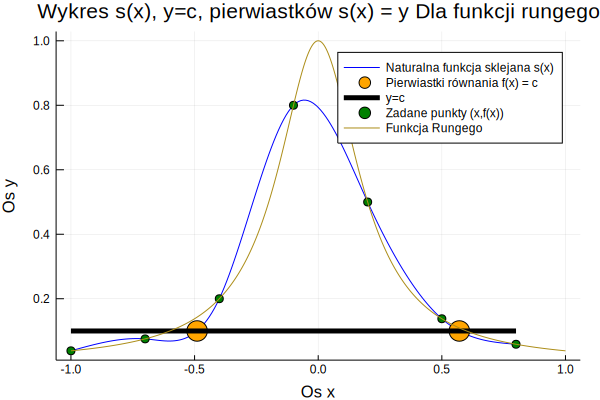

In [52]:
# funkcja Rungego
main([(x, 1/(25*x^2 + 1)) for x in -1:0.3:1], 0.1, " Dla funkcji rungego")
plot!()
plot!([x for x in -1.:0.001:1], map(x -> 1/(25*x^2+1), [x for x in -1:0.001:1]), lab = "Funkcja Rungego")

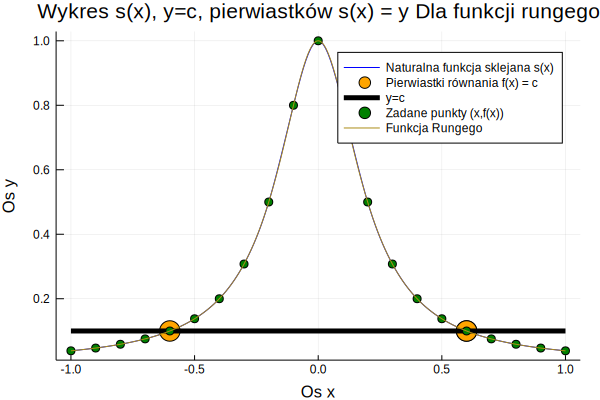

In [53]:
# funkcja Rungego
main([(x, 1/(25*x^2 + 1)) for x in -1:0.1:1], 0.1, " Dla funkcji rungego")
plot!()
plot!([x for x in -1.:0.001:1], map(x -> 1/(25*x^2+1), [x for x in -1:0.001:1]), lab = "Funkcja Rungego")

In [57]:
function intervals(coor, c)
    splajn = makeSpline(coor)
    PolynPrzedzialPrzedzialy =  VectorToList(map(spl -> Pojedyncze(spl[1], spl[2]), splajn))
    Czyste = deepcopy(PolynPrzedzialPrzedzialy)
    przefiltrowanePrzezC = map(PPP -> WKtorychNalezy(PPP, c), PolynPrzedzialPrzedzialy)
    return przefiltrowanePrzezC, Czyste
end

function Pojedyncze(splajn, przedzial)
    (xk,xkPlus1) = przedzial
    pochodna = polyder(splajn)
    pierwiastkiPochodnej = roots(pochodna)
    filter!(r -> imag(r) == 0, pierwiastkiPochodnej)
    pierwiastkiPochodnej = map(r -> real(r), pierwiastkiPochodnej)
    filter!(r -> xk < r < xkPlus1, pierwiastkiPochodnej)

    res = vcat([xk,xkPlus1], pierwiastkiPochodnej)
    res = sort(res)
    res = map(x -> (x,splajn(x)), res)
    res = myzip(res, res[2:end])
    return (splajn, przedzial, res)
end
function WKtorychNalezy(funkcja, c)
    (wielomian, Przedzial, Przedzialy) = funkcja
    function CzyNalezy(przedz)
        y1 = przedz[1][2]
        y2 = przedz[2][2]
        return (y1-c)*(y2-c) <= 0
    end
    filter!(CzyNalezy, Przedzialy)
    return (wielomian, Przedzial, Przedzialy)
end

# PPP = intervals([(x,x^2-1) for x in -2:1:10], 2)

function PlotPoch(coor, PPPs, c, a, b, name, prec = 0.01)
    function PlotC()
        plot!(plotka, [a,b], [c,c],  linecolor=:black, linewidth=5)
        # plot!(plotka, [a,b], [c,c], lab = "y=c",  linecolor=:black, linewidth=5)
    end
    function PlotF()
        xs, ys = myunzip(coor)
        scatter!(plotka, xs, ys, color=:green)
    end
    function PlotSpline(splajn, name="sk(x)", kolor=:blue, grubosc = 1)
        xs = []
        ys = []
        # ysPrim = []
        # ysPrimPrim = []
        for i in 1:length(splajn)
            xk = splajn[i][2][1]
            xkPlus1 = splajn[i][2][2]
            wielomian = splajn[i][1]
            xs = vcat(xs, [x for x in xk:prec:xkPlus1])
            ys = vcat(ys, map(wielomian, [x for x in xk:prec:xkPlus1]))
            # ysPrim = vcat(ysPrim, map(polyder(wielomian), [x for x in xk:prec:xkPlus1]))
            # ysPrimPrim = vcat(ysPrimPrim, map(polyder(polyder(wielomian)), [x for x in xk:prec:xkPlus1]))
        end
        plot!(plotka, xs, ys, linecolor=kolor, linewidth = grubosc)
        # plot!(plotka, xs, ysPrim, lab = "Naturalna funkcja sklejana s'(x)", linecolor=:green)
        # plot!(plotka, xs, ysPrimPrim, lab = "Naturalna funkcja sklejana s''(x)", linecolor=:black)
    end
    function StworzPrzedzial(spl, przed)
        x1 = przed[1][1]
        x2 = przed[2][1]
        return (spl, (x1,x2))
    end
    function SStworzPrzedzial(splajn)
        przedzialy = splajn[3]
        spl = splajn[1]
        res = map(przed -> StworzPrzedzial(spl, przed), przedzialy)
    end
    function SSStworzPrzedzial(PPPs)
        res = []
        for i in 1:length(PPPs)
            splajn = PPPs[i]
            res = vcat(res, SStworzPrzedzial(splajn))
        end
        return res
    end
    function PlotPrzedzialy(PPs)
        for i in 1:length(PPs)
            xk = PPs[i][2][1]
            xkPlus1 = PPs[i][2][2]
            wielomian = PPs[i][1]
            xs = [x for x in xk:prec:xkPlus1]
            ys = map(wielomian, [x for x in xk:prec:xkPlus1])
            plot!(plotka, xs, ys, linecolor = :red, linewidth = 7)
        end
    end
    przedzialyZC = SSStworzPrzedzial(PPPs)
    plotka = plot(leg = false)
    title!("Znajdowanie Przedzialow")
    xlabel!("Os x")
    ylabel!("Os y")
    PlotPrzedzialy(przedzialyZC)
    splajny = map(ppp -> (ppp[1], ppp[2]), PPPs)
    PlotSpline(splajny)
    PlotC()
    PlotF()
    # savefig("przedzialy")
    display(plotka)
end

function PrzedzialyZawierajaceC(PPPs, c)
    PPPs1 = deepcopy(PPPs)
    A = map(ppps -> WKtorychNalezy(ppps, c), PPPs1)
    zC = filter(ppp -> length(ppp[3]) > 0, A)
    return zC, length(zC)
end


function main(coor, c, name = "")
    coor = sort(coor)
    PPPs, Czyste = intervals(coor, c)

    a = coor[1][1]
    b = coor[end][1]

    PlotPoch(coor, PPPs, c, a, b, name)
    zC = filter(ppp -> length(ppp[3]) > 0, PPPs)
    return zC, Czyste, length(zC)
end


main (generic function with 2 methods)

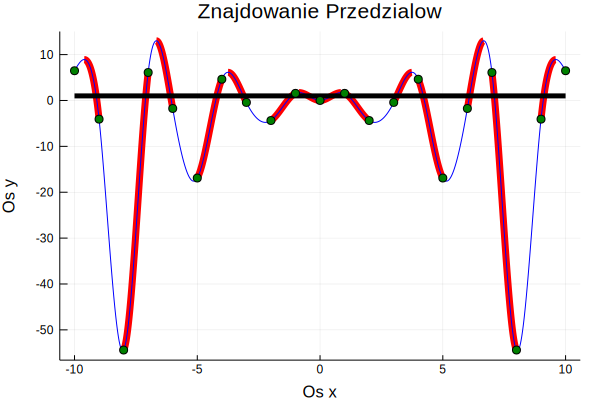

In [56]:
v = main([(x, rand()*10) for x in -30:3:30], 4)
PrzedzialyZawierajaceC(v[2], 2)

main([(x, x*tan(x)) for x in -10:1:10],1)
plot!()

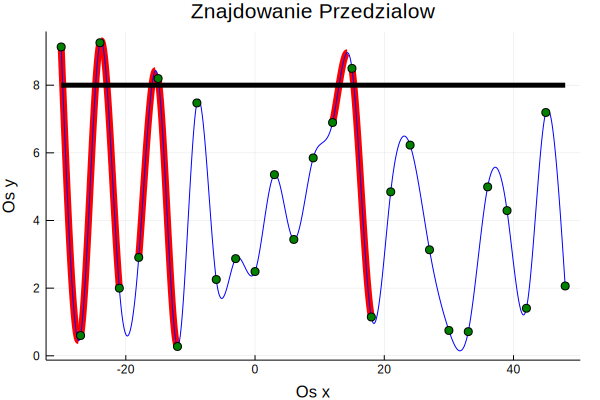

In [63]:
main([(x, rand()*10) for x in -30:3:50], 8)
plot!()

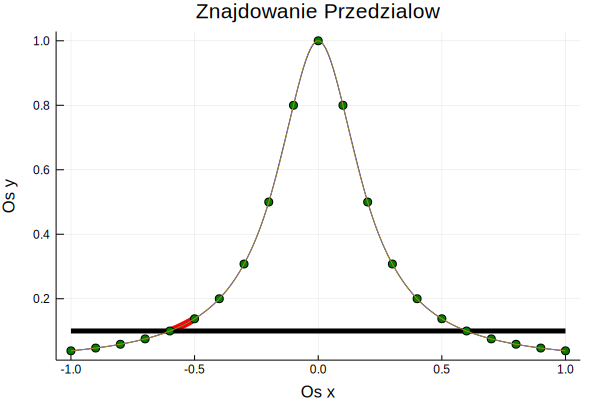

In [64]:
# funkcja Rungego
main([(x, 1/(25*x^2 + 1)) for x in -1:0.1:1], 0.1, " Dla funkcji rungego")
plot!()
plot!([x for x in -1.:0.001:1], map(x -> 1/(25*x^2+1), [x for x in -1:0.001:1]), lab = "Funkcja Rungego")